<a href="https://colab.research.google.com/github/Molten-Ice/3dGolfPoseEstimation/blob/colab/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3d Golf Pose Estimation

## Format input image

### Trim input video

In [1]:
# import os
# files_in_homedir = os.listdir('/content/')
# files_in_homedir = [file for file in files_in_homedir if file not in ('.config',  'sample_data')]
# input_filename = files_in_homedir[-1]
# print(f"--- Your filename is the following (check this is correct before proceeding) ---\n'{input_filename}'")

# os.rename(input_filename, 'input_video.mp4')

# !ffmpeg -ss 00:00:15 -to 00:00:19 -i input_video.mp4 -c copy output.mp4

# from IPython.display import HTML
# from base64 import b64encode
# mp4 = open('output.mp4','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

### Download example video

In [2]:
!wget https://github.com/Molten-Ice/3dGolfPoseEstimation/raw/main/media/test-video.mp4
import os
os.rename('/content/test-video.mp4', '/content/output.mp4')

--2023-05-12 12:57:21--  https://github.com/Molten-Ice/3dGolfPoseEstimation/raw/main/media/test-video.mp4
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Molten-Ice/3dGolfPoseEstimation/main/media/test-video.mp4 [following]
--2023-05-12 12:57:22--  https://raw.githubusercontent.com/Molten-Ice/3dGolfPoseEstimation/main/media/test-video.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1275371 (1.2M) [application/octet-stream]
Saving to: ‘test-video.mp4’

test-video.mp4      100%[===================>]   1.22M  --.-KB/s    in 0.06s   

2023-05-12 12:57:22 (19.6 MB/s) - ‘test-video.mp4’ saved [1

In [3]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Generate 3d & 2d keypoints

In [4]:
##2d golf club inference ##
!git clone https://github.com/Molten-Ice/3dGolfPoseEstimation.git
!python 3dGolfPoseEstimation/inference_2d.py --repo-dir '/content/3dGolfPoseEstimation/'

Cloning into '3dGolfPoseEstimation'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 469 (delta 44), reused 16 (delta 16), pack-reused 385
Receiving objects: 100% (469/469), 164.35 MiB | 18.73 MiB/s, done.
Resolving deltas: 100% (158/158), done.
Command chmod: CompletedProcess(args='chmod 600 ~/.kaggle/kaggle.json', returncode=0, stdout='', stderr='')
Command kaggle config: CompletedProcess(args='kaggle config set -n path -v /content/3dGolfPoseEstimation/downloaded-data/', returncode=0, stdout='- path is now set to: /content/3dGolfPoseEstimation/downloaded-data/\n', stderr='')
Command datasets download: CompletedProcess(args='kaggle datasets download jamesdavey/2dgolfmodels --force', returncode=0, stdout='Downloading 2dgolfmodels.zip to /content/3dGolfPoseEstimation/downloaded-data/datasets/jamesdavey/2dgolfmodels\n\n', stderr='\n  0%|          | 0.00/209M [00:00<?, ?B/s]\n  0%|      

In [5]:
!pip install -r 3dGolfPoseEstimation/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-s0dija8m
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-s0dija8m
  Resolved https://github.com/facebookresearch/detectron2.git to commit d4a5f28e01b2babbaba9f90198fb95f5c661cccd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!python 3dGolfPoseEstimation/setup.py
### 3d keypoints & detectron2 inference ###
!python 3dGolfPoseEstimation/VideoPose3D_inference.py

git clone VideoPose3D: CompletedProcess(args='git clone https://github.com/facebookresearch/VideoPose3D.git', returncode=0, stdout='', stderr="Cloning into 'VideoPose3D'...\n")
download 3d model: CompletedProcess(args='wget -P VideoPose3D/checkpoint/ https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin', returncode=0, stdout='', stderr='--2023-05-12 13:02:48--  https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin\nResolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.38, 13.35.7.82, 13.35.7.128, ...\nConnecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.38|:443... connected.\nHTTP request sent, awaiting response... 200 OK\nLength: 67892577 (65M) [application/octet-stream]\nSaving to: ‘VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin’\n\n     0K .......... .......... .......... .......... ..........  0% 14.8M 4s\n    50K .......... .......... .......... .......... ..........  0% 14.6M 4s\n   10

In [7]:
import sys
sys.path.insert(1, '/content/3dGolfPoseEstimation')
from helper_functions import load_keypoints, generate_aligned_coordinates, graph_coordinates, visualize_predictions
keypoints, poses, club_keypoints_2d, keypoints_metadata, keypoints_symmetry = load_keypoints()
adjusted_poses, club_coordinates, club_coordinates_original, all_z_coordinates = generate_aligned_coordinates(poses, keypoints, club_keypoints_2d, take_minimum = True)

Loading 2D detections...
Loading 3D detections...
Loading 2D club...
[[636.01965 240.7209 ]
 [637.93994 230.172  ]] [[ 3.0070642e-06 -2.2334632e-05  3.4110417e-06]
 [-1.7087556e-02  2.4511794e-02 -1.2118627e-01]] [[606 439]
 [823 631]]
Radius = 301.891 | sf 290.983


<Figure size 640x480 with 0 Axes>

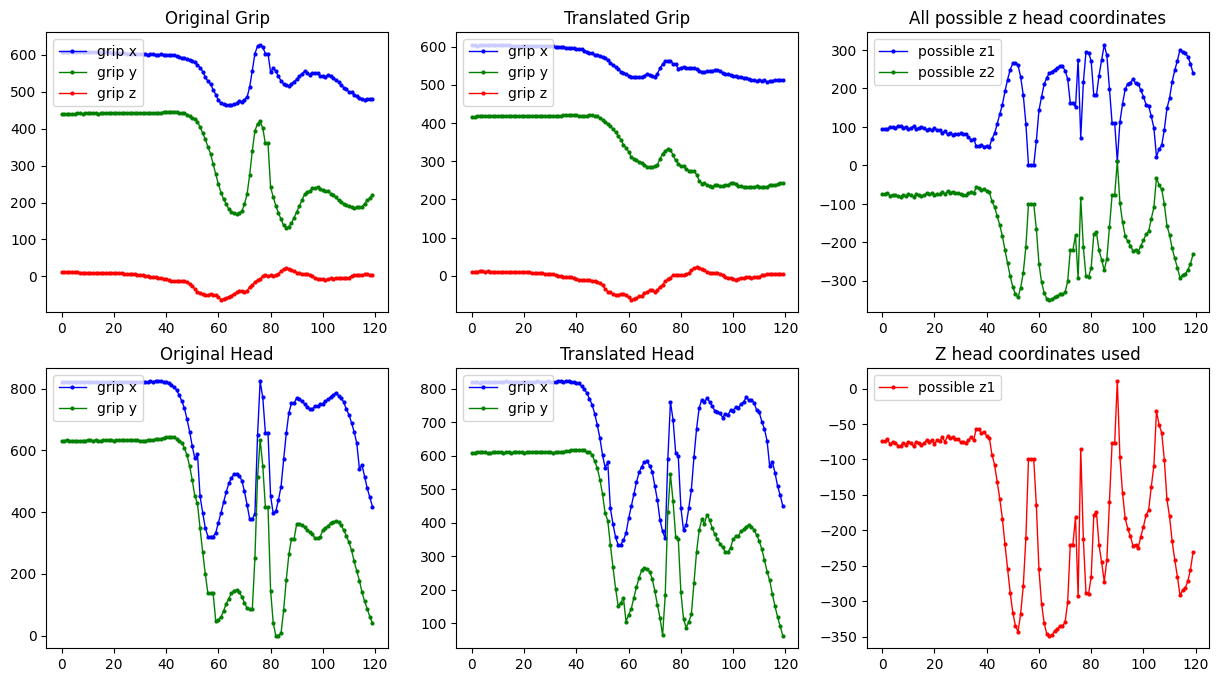

In [8]:
%matplotlib inline
graph_coordinates(club_coordinates_original, all_z_coordinates, club_coordinates)

In [9]:
visualize_predictions(keypoints, adjusted_poses, club_coordinates, club_keypoints_2d, keypoints_symmetry)

!cd frames && ffmpeg -start_number 0 -framerate 5 -i %d.jpg \
  -c:v libx264 -pix_fmt yuv420p golf_3d_pose_estimation.mp4
!mv frames/golf_3d_pose_estimation.mp4 golf_3d_pose_estimation.mp4

min_max values [[ 369.60510254  821.60467529]
 [ 105.49035645  633.9967041 ]
 [-339.23764953   71.96815491]]
Saved frame: [0/120]
Saved frame: [1/120]
Saved frame: [2/120]
Saved frame: [3/120]
Saved frame: [4/120]
Saved frame: [5/120]
Saved frame: [6/120]
Saved frame: [7/120]
Saved frame: [8/120]
Saved frame: [9/120]
Saved frame: [10/120]
Saved frame: [11/120]
Saved frame: [12/120]
Saved frame: [13/120]
Saved frame: [14/120]
Saved frame: [15/120]
Saved frame: [16/120]
Saved frame: [17/120]
Saved frame: [18/120]
Saved frame: [19/120]
Saved frame: [20/120]
Saved frame: [21/120]
Saved frame: [22/120]
Saved frame: [23/120]
Saved frame: [24/120]
Saved frame: [25/120]
Saved frame: [26/120]
Saved frame: [27/120]
Saved frame: [28/120]
Saved frame: [29/120]
Saved frame: [30/120]
Saved frame: [31/120]
Saved frame: [32/120]
Saved frame: [33/120]
Saved frame: [34/120]
Saved frame: [35/120]
Saved frame: [36/120]
Saved frame: [37/120]
Saved frame: [38/120]
Saved frame: [39/120]
Saved frame: [40/120]